# 动手深度学习

## pytorch基础

In [16]:
# 定义张量（数组）
x = torch.tensor([[1,2,3], [4,6,7]], dtype = torch.float32) # 相当于np.array()，极其相似，但是类型不同
x = torch.arange(12) # 跟np.arange()效果相同
torch.zeros(3,4) # 定义指定形状的数组，类似的numpy操作都可实现
# tensor的四则运算规则同数组的也是相同的性质
# 0维度张量，专门0维度张量的原因是：GPU中不能运行普通的1等标量，只能识别tensor(1)这种0维度张量
torch.tensor([1]) # 1维张量
torch.tensor(1) # 0维张量，也就是标量
# 高维张量：类似于高维numpy数组，不做具体介绍


# 查看张量信息
x.ndim # 返回维度数（有几个维度）
x.shape # 返回形状（每个层维度的个数组合）
len(x) # 返回张量多个维度中最高层级维度的个数
x.numel() # 最底层元素总数量
x.dtype # 查看张量数据类型


# 张量的形变
x = torch.tensor([[1,2,3,4],[5,6,7,8],[9,9,9,9]])
x.flatten() # 将任意维度张量拉伸为1维张量，包括0维张量
x.reshape(3, 4) # 改变张量为指定形状，跟np.reshape相同
x.reshape(12) # 变为1维张量，或者写作x.reshape(12,)，但是x.shape(12,1)是二维张量
# reshape的参数输入对应于.shape的结果，他们的意思是一样的


# 张量的索引
# 1. 与数组的索引相同，但要注意的是，索引找到的最基本的元素都是0维张量，不是基本的标量，比如索引结果是tensor(1),而不是1
# 2. 切片操作基本与numpy数组的索引相同，但有点区别，如下举例
x[1:8:2] # 从第2个元素到第8个元素隔2步索引一次
x[1::2] # 从第2个到尾，隔2步索引一次
x[::2] # 从头到尾，balabala
# 3. x[8:1:-2] 这种操作不行，torch不支持倒着索引
# 4. 高维张量索引，与numpy的也没什么
# 5. index_select(,,)索引：本质上任何索引都可以x[,,,...]解决，但是当维度很高的时候，有些操作会很麻烦。
# 比如我想对一个有100个维度的张量做操作：取出第50个维中的前两行，正常写法是x[:,:,:...,[0,1],:,:,...],过于麻烦，但使用index_select就很方便
# torch.index_select用于取出某一个特定维度的某几个列数据
x = torch.arange(24).reshape(2,3,4)
torch.index_select(x, 2, torch.tensor(0)) # 用法：x是目标张量，第二个参数是第几个维度，第三个参数是索引值，可以是多个，但必须是tensor型，不能是列表或数组型
torch.index_select(x, 1, torch.tensor([0])) # 只索引一个单位时，可以用0维或者1维张量
torch.index_select(x, 0, torch.tensor([0,1])) # 索引多个单位
# 注：torch.tensor([0:1])是不对的！，不能写成切片，第三个参数本质是一个tensor类型的数据！


# 张量的切分
# 1. view()方法，张量的视图
x = torch.arange(12).reshape(3,4)
y = x.view(4,3) # 此处view的作用类似于reshape。看上去y和x是不同的对象，但其实指向同一个存储空间，x和y可以看做一个数据的不同表现形式，改变x后Y也会改变，但仍然是不同形状

# 2. torch.chunk(t, 4, dim = 0)方法：将张量进行切分的函数。t是要被切分的张量，4是等切分成4份，dim是从哪个维度上切，0是默认最高维，以此类推
x = torch.arange(12).reshape(3,4)
y = torch.chunk(x, 4, dim = 1) # y是将x按列切分四等份的结果
# 注：关于输出结果：是一个元组，其元素是切分后的各个单位；切分后的个体也是tensor对象；切分后每个个体仍然保持没切分的维度，不会降维；
# 返回的结果也是视图，不是新对象；默认是等分，但如果不能等分也不会报错，会寻找近似等分，或者不等分

# 3. torch.split(t, [a1,a2,a3...], dim = ) 与chunk相似，但有区别，第二个参数可以输入一个列表，表示自定义切分分配方案，要求总和等于对应维度的分量个数
x = torch.arange(12).reshape(3,4)
y = torch.split(x, 4, dim = 1) # 此时的split与chunk效果相同
z = torch.split(x, [1,1,2], dim = 1) # 按照列进行1、1、2份数分配方案的切分


# 张量的合并
# 1. torch.cat([x,y], dim = 1)，张量拼接操作，类似于numpy的vstack和hstack，以及pandas的concat；dim是选择按哪个维度拼接，默认是0
x = torch.zeros((4,4))
y = torch.zeros((4,4))
torch.cat([x,y], dim = 1) # 按列拼接（横着拼）

# 2. torch.stack([x,y]) 张量堆叠函数，并不是拼接，而是把相同形状的多个张量堆到一起，整体升高一个维度（类似于list的append）
# 注：x和y的shape必须完全相同才行，否则会报错


# 张量的广播
# 1. 相同维度相同形状的两个张量广播，对应位置进行计算即可
# 2. 相同维度不同形状的两个张量广播，要求在导致形状不同的每个维度上，两个张量中至少有一个在该维度的分量数只有1才行
# 3. 不同维度的两个张量广播，低纬度的张量先升维到与高纬度张量相同维度，然后再按照同纬度张量广播规则判定即可
# 不同维度广播运算举例：x.shape = (2,1)， y.shape = (3,2,4)。x根据情况选择升维成(1,2,1)，然后(1,2,1)与(3,2,4)是课广播的


# 基本并行运算（axis与dim都可以使用，效果相同)
x = torch.arange(12).reshape(3,4)
x.sum() # 对所有元素求和
x.sum(dim = 0) # 对所有行求和，返回长度为3的向量
x.sum(dim = 1) # 对所有列求和，返回长度为4的向量
x,sum(dim = [0, 1]) # 对于多维数组，对其中某几维进行求和，这里只有2维所以结果跟sum()一样
# 排序运算
x = torch.randn(12).reshape(3,4) 
y = x.sort(dim = 1, descending = False).values # 将x按照某个维度升序（默认）排序，这个维度的每个分量都会独立进行排序（打乱对应关系），默认是0；返回的内容比较复杂，.values后是值



# 矩阵的基本运算
t1 = torch.arange(1,7).reshape(2,3).float()
t2 = torch.arange(1,10).reshape(3,3).float()
t = torch.arange(3).float()
torch.t(t1) # 矩阵转置 
torch.eye(3) # 单位阵创建
torch.diag(t1.reshape(6)) # 将1维张量变成对角阵元素
torch.dot(t,t) # 向量内积运算，dot只支持向量运算
torch.mm(t1,t2) # 矩阵乘法，t1 * t2是对应元素相乘
torch.mv(t1,t) ### 注意：特殊的矩阵与向量相乘的方法，并非是矩阵运算，而是把矩阵的每行当成一个向量分别与某个向量进行内积，返回各自内积结果组成的1维向量
torch.mv(t2, t.reshape(3,1)) # 会报错，不能竖着来
torch.mm(t1, t.reshape(3,1)) # 作为矩阵运算可以

# 矩阵线性代数运算（不举例了，懒）
torch.trace() # 矩阵的迹
torch.matrix_rank() # 矩阵的秩
torch.det() # 矩阵行列式计算
torch.inverse() # 矩阵求逆
torch.lstsq(y, X) # 最小二乘结果，y是因变量，X是带1列向量的变量矩阵
torch.linalg.norm(t) # 求张量内所有元素平方和开根号（必须是float类型）
torch.linalg.norm(t,1) # 求张量内所有元素绝对值和（必须是float类型）



# 微分运算
a = torch.tensor(1., requires_grad = True) # 创建一个张量的时候可以设置这个张量是否可以进行微分运算，默认是False（必须针对浮点型）
b = torch.tensor(1., requires_grad = True)
a.requires_grad # 用于查看这个张量是否可以微分
# a.requires_grad = False # 可以设置为False
sse = torch.pow((2-a-b),2) + torch.pow((4-3*a-b),2)
torch.autograd.grad(sse, [a, b]) # 这个是对sse这个函数进行偏导运算，a和b就是变量，但是要先赋值，然后返回的是sse在a和b两个方向的导数在他们各自取值下的导数值

x = torch.tensor(1., requires_grad = True)
y = x ** 2
y.retain_grad() # 加上这个后，z对x进行求导时候也能顺带保存z对y求导的中间结果，没有这句，不能y.grad
z = y ** 2
y.requires_grad # True
z.requires_grad # True
z.backward() # 反向传播，就是z对最底层的x求导，结果再代入x的值的最终结果，这个本身不返回什么
x.grad # 紧接着可以这样来查看刚才计算的结果，这个是用来看x的求导结果的
y.grad # 作为中间变量的y，在z对x求导的过程中，只有在y.retain_grad()被设置才可以
# y.backward() # y也是可以对x求梯度的
# 切记，一个计算图只能backward一次，比如z.backward()之后，就不能再y.backward()了，如下：
x = torch.arange(4., requires_grad = True)
y = torch.dot(x, x)
z = y ** 2 # xyz属于一个计算图
y.backward() # y先进行梯度下降
print(x.grad) 
z.backward() # 这时候会报错，因为这个计算图已经计算过梯度了

# 改成下面这样可避免问题
x = torch.arange(4., requires_grad = True)
y = torch.dot(x, x)
z = x.sum() # xy和xz属于两个不同的计算图
y.backward() # y先进行梯度下降
print(x.grad) 
z.backward() # 正常计算

# 继续引出手动梯度清零：上面结果中的第二个x.grad的输出值不是z对x求导代入后的值，而是这个值加上了之前y对x求导得到的值，x梯度会默认累加
x.grad.zero_() # 将过往累加的梯度清零，重新开始

tensor([[1, 2, 3],
        [4, 6, 7]])

### 深度模型训练/预测流程

{'epoch': 10, 'train_auc': 0.6890240560991914, 'val_auc': 0.6876221862538593}
{'epoch': 20, 'train_auc': 0.6906825378883971, 'val_auc': 0.6894832598913301}
{'epoch': 30, 'train_auc': 0.6936672061619087, 'val_auc': 0.6930791091016655}
{'epoch': 40, 'train_auc': 0.6913650786015225, 'val_auc': 0.6891752669335156}
EarlyStopping!!!


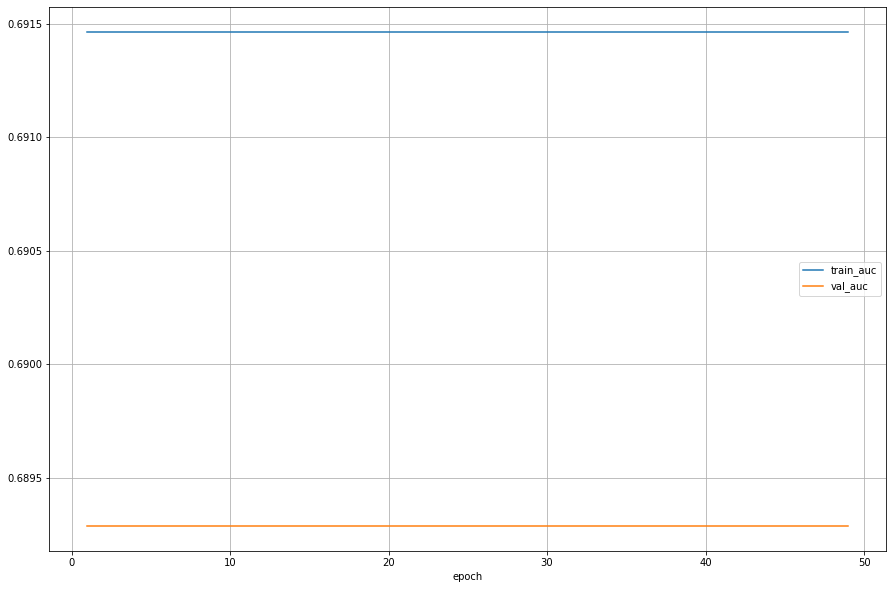

In [5]:
# %load dl_train_module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from collections import defaultdict
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score
import warnings
import os
warnings.filterwarnings('ignore') # 关闭警告

def create_dataloader(X, y, batch_size=1, shuffle=True): # 创建batch迭代器函数
    torch_dataset = TensorDataset(X, y) # 创建数据集，必须是tensor类型
    loader = DataLoader(dataset=torch_dataset, batch_size=batch_size, shuffle=shuffle)
    return loader


def get_loss(task): # 获取损失函数
    if task == "binary":
        criterion = torch.nn.BCELoss() # 注：此损失函数要求：1.每个样本只能有一个概率值，即输出是1 dim的tensor；2.要求标签是float类型
    elif task == "multiclass":
        criterion = torch.nn.CrossEntropyLoss() # 注：此损失函数要求：1.每个样本必须有每个类别的概率，即便是2分类，即输出是2 dim的tensor；2.要求标签是long类型；3.标签是1维数据，内容是0/1/2/......，从0开始的类别索引，不是从1开始，也不是多维onehot。
    elif task == "regression_1": # 回归类损失函数的标签形状要求和二分类的情况一致
        criterion = torch.nn.L1Loss()
    elif task == "regression_2":
        criterion = torch.nn.MSELoss()
    else:
        raise ValueError("Please input correct value!!!")
    return criterion


def get_optimizer(params, opt_criterion, learning_rate, l2): # 获取梯度优化器函数
    if learning_rate <= 0 or l2 < 0: 
        raise ValueError("Please input correct learning_rate and l2!!!")
    if opt_criterion.lower() == "adam":
        optimizer = torch.optim.Adam(params, lr=learning_rate, weight_decay=l2)
    elif opt_criterion.lower() == "adagrad":
        optimizer = torch.optim.Adagrad(params, lr=learning_rate, weight_decay=l2)
    elif opt_criterion.lower() == "rmsprop":
        optimizer = torch.optim.RMSprop(params, lr=learning_rate, weight_decay=l2)
    elif opt_criterion.lower() == "sgd":
        optimizer = torch.optim.SGD(params, lr=learning_rate, weight_decay=l2)
    else:
        raise ValueError("Please input correct opt_criterion!!!")
    return optimizer

def weight_init(m): # 网络参数初始化函数
    if isinstance(m, nn.Conv2d):
        torch.nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
    elif isinstance(m, nn.Linear):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.constant_(m.bias, 0)
    elif isinstance(m, nn.BatchNorm2d):
        torch.nn.init.constant_(m.weight, 1)
        torch.nn.init.constant_(m.bias, 0)
        

def seed_torch(seed=2022): # 固定所有随机种子函数
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed) # 为了禁止hash随机化，使得实验可复现
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) # if you are using multi-GPU.
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    

# 预测/验证函数
def predict_model(model, test_X, test_y = None, batch_size=1, task=None, metrics=None, device="cpu"): # 有test_y时验证，没有时预测
    test_loader = create_dataloader(test_X, test_y, batch_size=batch_size, shuffle=False)
    loss_func = get_loss(task)
    model = model.eval()
    pred_ans, loss = [], 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device).float()
            target = target.to(device).squeeze() # 真实标签不管什么时候都需要是1dim tensor数据
            target = target.long() if task == "multiclass" else target.float() # 但数据类型需要灵活，多分类时需要是long，其他时候都是float。
            output = model(data).squeeze(dim=-1) # 输出结果一定在最后一个维度处压缩一下，二分类和回归对此有要求，需要1维数据；而多分类输出虽然不是1dim，但它的最后一个维度不是1，所以不会受到这个压缩的影响，不会出错。
            pred_ans.append(output.cpu().data.numpy()) # 如果要将tensor类型转为numpy类型，那么该数据必须要存在cpu上才行！
            loss += loss_func(output, target).item()
    y_pred = np.concatenate(pred_ans).astype("float64")
    
    if test_y is not None:
        metrics_d = {}
        for i in metrics:
            if "auc" in i:
                metrics_d["auc"] = roc_auc_score(test_y.squeeze().data.numpy(), y_pred) # roc_auc_score的真实标签必须在前面
            elif "loss" in i:
                metrics_d["loss"] = loss/len(y_pred)
        return metrics_d
    else:
        return y_pred


def train_model(model, X, y, valid_data=None, valid_split=0., batch_size=1, opt_criterion="adam", task="binary", \
                metrics=["loss","auc"], eval_metric="auc", epochs=100, early_stopping_bounds=None, seed=2022, \
                learning_rate=0.01, l2=0.01, shuffle=True, save_path=None, device="cpu", verbose=0, is_plt=True):
    
    # 固定随机数种子
    seed_torch(seed=seed)
    
    # 模型设置
    model = model.to(device) # 将参数部署到指定设备
    model.apply(weight_init) # 初始化参数
    loss_func = get_loss(task) # 获取损失函数
    optimizer = get_optimizer(model.parameters(), opt_criterion, learning_rate, l2) # 获取梯度优化器
    
    # 数据设置
    X, y = torch.tensor(X), torch.tensor(y).unsqueeze(dim=1) # 将numpy的输入转为tensor，记得要将标签升维用以切分数据集，后面再降为1dim
    if valid_data and len(valid_data) == 2: # 优先自主设置验证集
        train_loader = create_dataloader(X, y, batch_size=batch_size, shuffle=shuffle)
        val_X, val_y = valid_data[0], valid_data[1]
        valid_loader = create_dataloader(val_X, val_y, batch_size=batch_size, shuffle=shuffle)
    elif 1 > valid_split > 0: # 从数据中拆分验证集
        len_data = list(range(X.shape[0]))
        np.random.shuffle(len_data)
        train_index, valid_index = len_data[:int((1-valid_split)*X.shape[0])], len_data[int((1-valid_split)*X.shape[0]):] # 获取训练集和验证集各自索引列表
        X, val_X, y, val_y = X[train_index], X[valid_index], y[train_index], y[valid_index]
        train_loader = create_dataloader(X, y, batch_size=batch_size, shuffle=shuffle)
        valid_loader = create_dataloader(val_X, val_y, batch_size=batch_size, shuffle=shuffle)
    elif valid_split == 0: # 如果不设置验证集
        train_loader = create_dataloader(X, y, batch_size=batch_size, shuffle=shuffle)
        valid_loader = None
    else:
        raise ValueError("Please input correct valid_dataset!!!")

    # 训练模型
    metrics_total = [] # 所有迭代次数指标结果集合
    metrics_dict = {} # 每个epoch指标结果
    if eval_metric or save_path: # 如果使用早停或者要保存参数
        if eval_metric not in ["auc", "loss", None]:
                raise ValueError("Please input correct eval_metric!!!!")
        threshold = float("inf") # 早停阈值（实时更新）
        cnt = 0 # 早停计数器
    
    for epoch in range(1, epochs+1):
        metrics_dict["epoch"] = epoch
        
        # 训练
        model = model.train()
        for data, target in train_loader:
            data = data.to(device).float()
            target = target.to(device).squeeze()
            target = target.long() if task == "multiclass" else target.float()
            output = model(data).squeeze(dim=-1) # 如果是二分类或回归，输出必须是1dim，如果是多分类，dim=-1不会改变输出
            loss = loss_func(output, target)
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=20, norm_type=2) # 梯度裁剪，参数介绍：参数集合；最大梯度范数；梯度范数类型
            optimizer.step()
            
        # 训练集指标获取
        metric_train_dict = predict_model(model, X, y, batch_size=batch_size, task=task, metrics=metrics, device=device)
        for i in metric_train_dict: metrics_dict["train_"+i] = metric_train_dict[i]
        if not valid_loader: 
            if verbose > 0 and epoch % verbose == 0: print(metrics_dict) # 如果不需要验证直接输出指标结果
            metrics_total.append(metrics_dict) # 记录指标结果
        
        # 验证
        if valid_loader: # 如果需要验证
            # 验证集指标获取
            metric_val_dict = predict_model(model, val_X, val_y, batch_size=batch_size, task=task, metrics=metrics, device=device)
            for i in metric_val_dict: metrics_dict["val_"+i] = metric_val_dict[i]
            if verbose > 0 and epoch % verbose == 0: print(metrics_dict)
            metrics_total.append(metrics_dict) # 记录指标结果
            
            if eval_metric or save_path:        
                val_metric = metrics_dict["val_"+eval_metric] if eval_metric == "loss" else -metrics_dict["val_"+eval_metric]
                if val_metric < threshold:
                    threshold, cnt = val_metric, 0
                    if save_path:
                        torch.save(model.state_dict(), save_path) # 载入模型参数时：model = Network().load_state_dict(torch.load(path)), Network是该自定义的网络
                        print("model is saved")
                elif val_metric >= threshold and eval_metric:
                    cnt += 1
                    if cnt > early_stopping_bounds: 
                        print("EarlyStopping!!!")
                        break
    
        
    # 指标可视化
    if is_plt:
        metrics_total_dict = defaultdict(list)
        for m_dict in metrics_total:
            for key in m_dict:
                if key != "epoch": metrics_total_dict[key].append(m_dict[key])
        metrics_total_list = list(metrics_total_dict.values())
        metrics_total_names = list(metrics_total_dict.keys())
        fig, ax = plt.subplots(len(metrics_total_list)//2, figsize=(15,10))
        if not isinstance(ax, np.ndarray): ax = [ax]
        for i in range(len(ax)):
            train_data, valid_data = metrics_total_list[i], metrics_total_list[i+2 if len(ax) == 2 else -1]
            train_name, valid_name = metrics_total_names[i], metrics_total_names[i+2 if len(ax) == 2 else -1]
            ax[i].plot(range(1, len(train_data)+1), train_data, label=train_name)
            ax[i].plot(range(1, len(valid_data)+1), valid_data, label=valid_name)
            ax[i].set_xlabel('epoch')
            ax[i].grid(True)
            ax[i].legend()

    return model

if __name__ == "__main__":
    # 获取数据
    df = pd.read_csv("./dataset/binary_practice_data.csv")
    X, y = df.iloc[:,:-1], df.iloc[:,-1]
    fea_names = list(X.columns)
    X_np, y_np = np.array(X), np.array(y)
    X_tensor, y_tensor = torch.tensor(np.array(X)).float(), torch.tensor(np.array(y)).float().unsqueeze(dim=1)
    
    # 定义网络
    class Net(nn.Module): # 定义网络结构
        def __init__(self, dim=10):
            super(Net, self).__init__()
            self.f = nn.Sequential(nn.Linear(dim, dim), nn.Linear(dim, dim), nn.Linear(dim, dim//2), \
                                   nn.Linear(dim//2, dim//2//2), nn.Linear(dim//2//2, 1))
            self.dropout = nn.Dropout(0.2)
        def forward(self, x):
            return F.sigmoid(self.dropout(self.f(x)))
    # 开始训练
    model = Net(dim=49)
    model1 = train_model(model, X_np, y_np, valid_data=None, valid_split=0.2, batch_size=128, opt_criterion="adam", task="binary", \
                metrics=["auc"], eval_metric="auc", epochs=100, early_stopping_bounds=10, \
                learning_rate=0.01, l2=0.01, shuffle=True, save_path=None, device="cpu", verbose=10, is_plt=True)

## 循环网络介绍

一些注意的点，下面代码暂时没有涉及：
1.训练时每次epoch都要使用mini-batch数据
2.注意每次输入和输出的shape以及对应的数据类型
3.每个epoch后分别记录一次训练集和验证集的loss和ACC、AUC等评分指标，并最终画图展示以观察拟合情况（过拟合or欠拟合）
4.由于模型涉及随机初始化和随机GD，相同模型和数据重复结果未必相同，所以要重复执行整个流程多次，叠加多个图＆平均多个结果。
5.LSTM很容易过拟合，dropout是必要的步骤，可以在embedding后和LSTM层后都加入
6.模型的复杂度要和数据量相适应！
7.批量归一化也是比较重要的
8.设置早停
更多内容见：https://blog.csdn.net/fu_jian_ping/article/details/109147133?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522164423947516781683998851%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=164423947516781683998851&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-109147133.first_rank_v2_pc_rank_v29&utm_term=LSTM%E5%8F%82%E6%95%B0%E8%B0%83%E6%95%B4&spm=1018.2226.3001.4187

#### RNN

In [1]:
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
import sys
sys.path.append("..")

num_time_steps = 50
start = np.random.randint(3, size = 1)[0]
time_steps = np.linspace(start, start + 10, num_time_steps)
data = np.sin(time_steps).reshape(num_time_steps, 1)
x = torch.tensor(data[:-1]).float().view(1, num_time_steps-1, 1)
y = torch.tensor(data[1:]).float().view(1, num_time_steps-1, 1)

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size): # 参数设置别忘了（这些参数不会默认传给forward函数）
        super().__init__()
        self.rnn = nn.RNN(
            input_size = input_size, # 特征维度
            hidden_size = hidden_size, # 隐层神经元数
            num_layers = num_layers, # 隐层数
            batch_first = True # 是否让batch参数总是在第一位
        )
        self.linear = nn.Linear(hidden_size, output_size) # 输出线性层，如果是分类问题这里的output_size应该是类别数，且要再下面加一层softmax
        
    def forward(self, x, hidden_inital): # hidden_inital是初始存储状态，可不写，那样默认全是0
        out, hidden_final = self.rnn(x, hidden_inital) # 返回值：第一个是每个时点的输出值，shape是[batch,sep,output_size];第二个是每个最后一个时点的所有隐层的存储状态，shape是[batch_size,layer_size,hidden_size]
        out = self.linear(out) # 套输出层
        out = out.squeeze(dim = 0) # 把输出结果降维
        return out, hidden_final

def xavier(m): # 参数Xavier初始化
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        
model = Net(1, 20, 1, 1) # 创建网络（别忘了输入参数）
model.apply(xavier) # 应用初始化参数
criterion = nn.MSELoss() # 损失函数
optimizer = optim.Adam(model.parameters(), lr = 0.03) # 梯度优化器
hidden_inital = torch.zeros(1, 1, 20) # 初始隐层状态设置（非必须项）

epoch = 6
for iter in range(epoch):
    output, hidden_final = model(x, hidden_inital) # 跑模型，得到每个时点的预测结果
    hidden_final = hidden_final.detach()
    loss = criterion(output, y) # 计算损失函数
    optimizer.zero_grad() # 清零过往参数的梯度结果
    loss.backward() # 根据损失函数值计算梯度
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=20, norm_type=2) # 梯度裁剪，参数介绍：参数集合；最大梯度范数；梯度范数类型
    optimizer.step() # 根据梯度更新参数
    if iter % 100 == 0: print("Iteration: {} loss {}".format(iter, loss.item())) # 每100次迭代返回一次结果

pred = [] # 每个时点的预测结果
test_x = x[:, 0, :]
for i in range(x.shape[1]):
    test_x = test_x.view(1,1,1)
    pre, h = model(test_x, hidden_inital)
    test_x = pre
    pred.append(pre.squeeze().detach())
x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1], x.squeeze())
plt.plot(time_steps[:-1], x.ravel())
plt.scatter(time_steps[:-1], pred)
plt.show()

# 模型存储
# torch.save(model.state_dict(), "simple_net") # 存储训练好的模型参数
# model1 = Net() # 加载的时候自行写模型
# model1.load_state_dict(torch.load("simple_net")) # 加载模型参数
# model1.eval() # 固定非参数层

NameError: name 'hidden_inital' is not defined

#### LSTM

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn, optim

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size,vocab_size. embedding_dim): # 参数设置别忘了（这些参数不会默认传给forward函数）
        super().__init__()
        self.embedding = nn.Embedding(vocab_size. embedding_dim)
        self.rnn = nn.LSTM(
            input_size = input_size, # 特征维度
            hidden_size = hidden_size, # 隐层神经元数
            num_layers = num_layers, # 隐层数
            batch_first = True # 是否让batch参数总是在第一位
        )
        self.linear = nn.Linear(hidden_size, output_size) # 输出线性层，如果是分类问题这里的output_size应该是类别数，且要再下面加一层softmax
        
    def forward(self, x, hidden_inital): # hidden_inital是初始存储状态，可不写，那样默认全是0
        out, hidden_final = self.rnn(x, hidden_inital) # 返回值：第一个是每个时点的输出值，shape是[batch,sep,output_size];第二个是每个最后一个时点的所有隐层的存储状态，shape是[batch_size,layer_size,hidden_size]
        out = self.linear(out) # 套输出层
        out = out.unsqueeze(dim = 0) # 把输出结果降维
        return out, hidden_final

In [21]:
emb = nn.Embedding(3,2)
x = torch.tensor([[0,0],[1,1],[2,2]])
x = torch.randn(4,3,2)
x

tensor([[[-0.5131, -0.9116],
         [-0.7529, -2.9124],
         [ 0.5857,  0.1588]],

        [[ 0.0643, -0.1037],
         [-0.3135,  1.4883],
         [-0.6787,  0.0332]],

        [[ 0.2943,  2.2066],
         [ 0.3448,  0.5130],
         [ 0.7544, -2.6062]],

        [[ 0.3048, -0.1155],
         [-1.3388, -1.2959],
         [-1.1404, -0.4734]]])

In [27]:
linear = nn.Linear(2, 1)
x = torch.randn(5, 3, 2)
linear(x)

tensor([[[-0.0713],
         [ 0.8296],
         [-0.7156]],

        [[-0.4200],
         [ 0.7204],
         [ 0.5326]],

        [[ 0.0787],
         [-0.1089],
         [ 0.5416]],

        [[ 0.2934],
         [-0.5873],
         [ 0.8578]],

        [[-0.3617],
         [-0.8861],
         [-0.6540]]], grad_fn=<AddBackward0>)

In [29]:
x

tensor([[[ 0.0516, -0.0358],
         [ 1.0483, -0.6792],
         [ 0.2636,  1.3180]],

        [[-0.7964, -0.2332],
         [ 0.1738, -1.3295],
         [ 0.2012, -0.9681]],

        [[ 1.8757,  1.4593],
         [-0.2722, -0.2815],
         [ 0.9224, -0.2873]],

        [[ 0.6077, -0.1488],
         [-0.2370,  0.6056],
         [ 0.9523, -0.8223]],

        [[ 0.8626,  1.2658],
         [-0.7258,  0.6662],
         [-1.1668, -0.1738]]])

In [43]:
x1 = x.reshape(-1,2)
linear(x1).reshape(5,-1)[:,-1]

tensor([-0.7156,  0.5326,  0.5416,  0.8578, -0.6540], grad_fn=<SelectBackward>)

In [42]:
x2 = x[:,-1:,:].squeeze()
linear(x2).squeeze(dim=-1)

tensor([-0.7156,  0.5326,  0.5416,  0.8578, -0.6540],
       grad_fn=<SqueezeBackward1>)

### Transformer源码(仅供参考）

写框架的时候两个要点：
- 先写大框架，再写小框架，一级一级往下写
- 不确定的输入形式可以先不写，后面补上
- 时刻清楚数据在每个部分流转时候的形态和类型

In [ ]:
# code by Tae Hwan Jung(Jeff Jung) @graykode, Derek Miller @dmmiller612
# Reference : https://github.com/jadore801120/attention-is-all-you-need-pytorch
#           https://github.com/JayParks/transformer
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# S: Symbol that shows starting of decoding input
# E: Symbol that shows starting of decoding output
# P: Symbol that will fill in blank sequence if current batch data size is short than time steps

def make_batch(sentences):
    input_batch = [[src_vocab[n] for n in sentences[0].split()]]
    output_batch = [[tgt_vocab[n] for n in sentences[1].split()]]
    target_batch = [[tgt_vocab[n] for n in sentences[2].split()]]
    return torch.LongTensor(input_batch), torch.LongTensor(output_batch), torch.LongTensor(target_batch)

def get_sinusoid_encoding_table(n_position, d_model):
    def cal_angle(position, hid_idx):
        return position / np.power(10000, 2 * (hid_idx // 2) / d_model)
    def get_posi_angle_vec(position):
        return [cal_angle(position, hid_j) for hid_j in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(n_position)])
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # dim 2i
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # dim 2i+1
    return torch.FloatTensor(sinusoid_table)

def get_attn_pad_mask(seq_q, seq_k):
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    # eq(zero) is PAD token
    pad_attn_mask = seq_k.data.eq(0).unsqueeze(1)  # batch_size x 1 x len_k(=len_q), one is masking
    return pad_attn_mask.expand(batch_size, len_q, len_k)  # batch_size x len_q x len_k

def get_attn_subsequent_mask(seq):
    attn_shape = [seq.size(0), seq.size(1), seq.size(1)]
    subsequent_mask = np.triu(np.ones(attn_shape), k=1)
    subsequent_mask = torch.from_numpy(subsequent_mask).byte()
    return subsequent_mask

class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k) # scores : [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        scores.masked_fill_(attn_mask, -1e9) # Fills elements of self tensor with value where mask is one.
        attn = nn.Softmax(dim=-1)(scores)
        context = torch.matmul(attn, V)
        return context, attn

class MultiHeadAttention(nn.Module):
    def __init__(self):
        super(MultiHeadAttention, self).__init__()
        self.W_Q = nn.Linear(d_model, d_k * n_heads)
        self.W_K = nn.Linear(d_model, d_k * n_heads)
        self.W_V = nn.Linear(d_model, d_v * n_heads)
        self.linear = nn.Linear(n_heads * d_v, d_model)
        self.layer_norm = nn.LayerNorm(d_model)

    def forward(self, Q, K, V, attn_mask):
        # q: [batch_size x len_q x d_model], k: [batch_size x len_k x d_model], v: [batch_size x len_k x d_model]
        residual, batch_size = Q, Q.size(0)
        # (B, S, D) -proj-> (B, S, D) -split-> (B, S, H, W) -trans-> (B, H, S, W)
        q_s = self.W_Q(Q).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # q_s: [batch_size x n_heads x len_q x d_k]
        k_s = self.W_K(K).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # k_s: [batch_size x n_heads x len_k x d_k]
        v_s = self.W_V(V).view(batch_size, -1, n_heads, d_v).transpose(1,2)  # v_s: [batch_size x n_heads x len_k x d_v]

        attn_mask = attn_mask.unsqueeze(1).repeat(1, n_heads, 1, 1) # attn_mask : [batch_size x n_heads x len_q x len_k]

        # context: [batch_size x n_heads x len_q x d_v], attn: [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        context, attn = ScaledDotProductAttention()(q_s, k_s, v_s, attn_mask)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, n_heads * d_v) # context: [batch_size x len_q x n_heads * d_v]
        output = self.linear(context)
        return self.layer_norm(output + residual), attn # output: [batch_size x len_q x d_model]

class PoswiseFeedForwardNet(nn.Module):
    def __init__(self):
        super(PoswiseFeedForwardNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.layer_norm = nn.LayerNorm(d_model)

    def forward(self, inputs):
        residual = inputs # inputs : [batch_size, len_q, d_model]
        output = nn.ReLU()(self.conv1(inputs.transpose(1, 2)))
        output = self.conv2(output).transpose(1, 2)
        return self.layer_norm(output + residual)

class EncoderLayer(nn.Module):
    def __init__(self):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, enc_inputs, enc_self_attn_mask):
        enc_outputs, attn = self.enc_self_attn(enc_inputs, enc_inputs, enc_inputs, enc_self_attn_mask) # enc_inputs to same Q,K,V
        enc_outputs = self.pos_ffn(enc_outputs) # enc_outputs: [batch_size x len_q x d_model]
        return enc_outputs, attn

class DecoderLayer(nn.Module):
    def __init__(self):
        super(DecoderLayer, self).__init__()
        self.dec_self_attn = MultiHeadAttention()
        self.dec_enc_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, dec_inputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask):
        dec_outputs, dec_self_attn = self.dec_self_attn(dec_inputs, dec_inputs, dec_inputs, dec_self_attn_mask)
        dec_outputs, dec_enc_attn = self.dec_enc_attn(dec_outputs, enc_outputs, enc_outputs, dec_enc_attn_mask)
        dec_outputs = self.pos_ffn(dec_outputs)
        return dec_outputs, dec_self_attn, dec_enc_attn

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.src_emb = nn.Embedding(src_vocab_size, d_model)
        self.pos_emb = nn.Embedding.from_pretrained(get_sinusoid_encoding_table(src_len+1, d_model),freeze=True)
        self.layers = nn.ModuleList([EncoderLayer() for _ in range(n_layers)])

    def forward(self, enc_inputs): # enc_inputs : [batch_size x source_len]
        enc_outputs = self.src_emb(enc_inputs) + self.pos_emb(torch.LongTensor([[1,2,3,4,0]]))
        enc_self_attn_mask = get_attn_pad_mask(enc_inputs, enc_inputs)
        enc_self_attns = []
        for layer in self.layers:
            enc_outputs, enc_self_attn = layer(enc_outputs, enc_self_attn_mask)
            enc_self_attns.append(enc_self_attn)
        return enc_outputs, enc_self_attns

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.tgt_emb = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_emb = nn.Embedding.from_pretrained(get_sinusoid_encoding_table(tgt_len+1, d_model),freeze=True)
        self.layers = nn.ModuleList([DecoderLayer() for _ in range(n_layers)])

    def forward(self, dec_inputs, enc_inputs, enc_outputs): # dec_inputs : [batch_size x target_len]
        dec_outputs = self.tgt_emb(dec_inputs) + self.pos_emb(torch.LongTensor([[5,1,2,3,4]]))
        dec_self_attn_pad_mask = get_attn_pad_mask(dec_inputs, dec_inputs)
        dec_self_attn_subsequent_mask = get_attn_subsequent_mask(dec_inputs)
        dec_self_attn_mask = torch.gt((dec_self_attn_pad_mask + dec_self_attn_subsequent_mask), 0)

        dec_enc_attn_mask = get_attn_pad_mask(dec_inputs, enc_inputs)

        dec_self_attns, dec_enc_attns = [], []
        for layer in self.layers:
            dec_outputs, dec_self_attn, dec_enc_attn = layer(dec_outputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask)
            dec_self_attns.append(dec_self_attn)
            dec_enc_attns.append(dec_enc_attn)
        return dec_outputs, dec_self_attns, dec_enc_attns

class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.encoder = Encoder() # 定义encoder类
        self.decoder = Decoder() # 定义Decoder类
        self.projection = nn.Linear(d_model, tgt_vocab_size, bias=False) # 
    def forward(self, enc_inputs, dec_inputs):
        enc_outputs, enc_self_attns = self.encoder(enc_inputs)
        dec_outputs, dec_self_attns, dec_enc_attns = self.decoder(dec_inputs, enc_inputs, enc_outputs)
        dec_logits = self.projection(dec_outputs) # dec_logits : [batch_size x src_vocab_size x tgt_vocab_size]
        return dec_logits.view(-1, dec_logits.size(-1)), enc_self_attns, dec_self_attns, dec_enc_attns

def showgraph(attn):
    attn = attn[-1].squeeze(0)[0]
    attn = attn.squeeze(0).data.numpy()
    fig = plt.figure(figsize=(n_heads, n_heads)) # [n_heads, n_heads]
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attn, cmap='viridis')
    ax.set_xticklabels(['']+sentences[0].split(), fontdict={'fontsize': 14}, rotation=90)
    ax.set_yticklabels(['']+sentences[2].split(), fontdict={'fontsize': 14})
    plt.show()

if __name__ == '__main__': # 框架搭建完毕，开始使用
    # 数据集，只有一个样本，包含编码器输入，解码器输入和真实标签三部分
    sentences = ['ich mochte ein bier P', 'S i want a beer', 'i want a beer E'] # P是填充字符；S是开始字符；E是结束字符
    src_vocab = {'P': 0, 'ich': 1, 'mochte': 2, 'ein': 3, 'bier': 4} # 编码端字典
    src_vocab_size = len(src_vocab) # 字典长度

    tgt_vocab = {'P': 0, 'i': 1, 'want': 2, 'a': 3, 'beer': 4, 'S': 5, 'E': 6} # 解码端字典，一般与编码端是一样的
#     number_dict = {i: w for i, w in enumerate(tgt_vocab)}
    tgt_vocab_size = len(tgt_vocab) # 解码端字典长度

    src_len = 5 # length of source # 编码端输入句子长度
    tgt_len = 5 # length of target # 解码端输入句子长度

    d_model = 512  # Embedding Size # 输入向量经过embedding层后输入的维度
    d_ff = 2048  # FeedForward dimension # 全连接层的维度
    d_k = d_v = 64  # dimension of K(=Q), V # 输入转化为query,key,value向量的维度
    n_layers = 6  # number of Encoder of Decoder Layer # 编码和解码器中block的数量
    n_heads = 8  # number of heads in Multi-Head Attention # 多头注意力机制的数量

    model = Transformer() # 定义transformer层

    criterion = nn.CrossEntropyLoss() # 定义损失函数
    optimizer = optim.Adam(model.parameters(), lr=0.001) # 定义迭代优化器

    # 数据处理，将文本型数据进行分词，并转为在字典中对应的索引，这里由于只有一个样本，就没使用迭代器
    enc_inputs, dec_inputs, target_batch = make_batch(sentences) # 输出三个部分，分别是编码器、解码器和标签的索引LongTenor列表

    for epoch in range(20): # 开始迭代
        optimizer.zero_grad() # 参数梯度清零
        outputs, enc_self_attns, dec_self_attns, dec_enc_attns = model(enc_inputs, dec_inputs) # 输入输出
        loss = criterion(outputs, target_batch.contiguous().view(-1)) # 计算损失函数
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss)) # 打印迭代结果
        loss.backward() # 反向传播
        optimizer.step() # 更新参数

    # Test
    predict, _, _, _ = model(enc_inputs, dec_inputs)
    predict = predict.data.max(1, keepdim=True)[1]
    print(sentences[0], '->', [number_dict[n.item()] for n in predict.squeeze()])

    print('first head of last state enc_self_attns')
    showgraph(enc_self_attns)

    print('first head of last state dec_self_attns')
    showgraph(dec_self_attns)

    print('first head of last state dec_enc_attns')
    showgraph(dec_enc_attns)

Epoch: 0001 cost = 2.280869
Epoch: 0002 cost = 3.970184
Epoch: 0003 cost = 2.795365
Epoch: 0004 cost = 5.159268
Epoch: 0005 cost = 3.878076
Epoch: 0006 cost = 5.810416
Epoch: 0007 cost = 5.532382
Epoch: 0008 cost = 4.226982
Epoch: 0009 cost = 5.170188
Epoch: 0010 cost = 1.904359
Epoch: 0011 cost = 2.123083
Epoch: 0012 cost = 2.040266
Epoch: 0013 cost = 2.028134
Epoch: 0014 cost = 2.044340
Epoch: 0015 cost = 1.865151
Epoch: 0016 cost = 1.688594
Epoch: 0017 cost = 1.676789
Epoch: 0018 cost = 1.732380
Epoch: 0019 cost = 1.743735
Epoch: 0020 cost = 1.714740
ich mochte ein bier P -> ['E', 'E', 'E', 'E', 'E']
first head of last state enc_self_attns


### 文本数据预处理过程

#### 1. 使用gensim处理

In [102]:
from gensim import corpora
from gensim import models

documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

# 去掉停用词
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist] for document in documents]
print("texts: {}".format(texts))

dictionary = corpora.Dictionary(texts)   # 生成词典
# 去掉出现少于两次的单词，去掉出现多于5次的单词，剩下的单词保留前100个
dictionary.filter_extremes(no_below = 2, no_above = 5, keep_n = 100)
texts1 = [[word for word in text if word in dictionary.token2id] for text in texts] # 更新texts
print("\ntexts1: {}".format(texts1))
print("\nID: ", dictionary.token2id) # diction.token2id 存放的是单词-id key-value对
print("Freq: ", dictionary.dfs) # diction.dfs 存放的是单词的出现频率

# 1. 下面是用TF-IDF模型进行编码
# 参考资料1：https://zhuanlan.zhihu.com/p/37175253
# 参考资料2：https://www.cnblogs.com/keye/p/9190304.html

# 建立语料库
corpus = [dictionary.doc2bow(text) for text in texts] # 将文本数据转为id和频率数据（主要看dic的状态，texts不更新结果也一样）
print("\ncorpus: {}".format(corpus))

# 建立TF-IDF模型并生成矩阵
tfidf_model = models.TfidfModel(corpus) # 训练TF-IDF模型，这个模型可以保存，详情见参考资料
corpus_tfidf = tfidf_model[corpus] # 进行预测，获得TF-IDF矩阵，但是是个迭代器类型，只能用for来把每个样本的向量取出
# 注意：上面这个预测过程不仅仅可以预测原数据，也可以预测别的数据，只要保证数据格式符合要求，且其映射成的字典需与模型训练集的相同
print("TFIDF矩阵: {}".format([v for v in corpus_tfidf]))

# 2. 下面是用work2vec方法进行编码
# 关于使用方法的详情，请见官方文档：https://radimrehurek.com/gensim/models/word2vec.html
model = models.word2vec.Word2Vec(texts1, min_count=1) # 训练模型，输入的是分词的结果，参数细节见https://blog.csdn.net/u011748542/article/details/85880852
model.wv.most_similar("user",topn=10) # 计算训练集见过的词中与输入词的相似度，并降序排列取出前十个(输入词必须见过)
model.wv.similarity('user', 'computer') # 计算两个输入词的相似性（输入词必须都见过）
# model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1) # 猜词，结果是queen，这个不使用前面的数据了
model.wv[texts1[0]].mean(axis = 1) # 测试模型，输入的词必须是训练过的，这里输入第一个样本的分词结果，得到第一个样本的全部词向量，然后做平均

texts: [['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'], ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'management', 'system'], ['system', 'human', 'system', 'engineering', 'testing', 'eps'], ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'], ['generation', 'random', 'binary', 'unordered', 'trees'], ['intersection', 'graph', 'paths', 'trees'], ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'], ['graph', 'minors', 'survey']]

texts1: [['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]

ID:  {'computer': 0, 'human': 1, 'interface': 2, 'response': 3, 'survey': 4, 'system': 5, 'time': 6, 'user': 7, 'eps': 8, 'tree

array([[ 9.7702928e-03,  8.1651136e-03,  1.2809705e-03,  5.0975773e-03,
         1.4081288e-03, -6.4551616e-03, -1.4280510e-03,  6.4491653e-03,
        -4.6173073e-03, -3.9930656e-03,  4.9244044e-03,  2.7130984e-03,
        -1.8479753e-03, -2.8769446e-03,  6.0107303e-03, -5.7167388e-03,
        -3.2367038e-03, -6.4878250e-03, -4.2346334e-03, -8.5809948e-03,
        -4.4697905e-03, -8.5112313e-03,  1.4037776e-03, -8.6181974e-03,
        -9.9166557e-03, -8.2016252e-03, -6.7726658e-03,  6.6805840e-03,
         3.7845564e-03,  3.5616636e-04, -2.9579829e-03, -7.4283220e-03,
         5.3341867e-04,  4.9989222e-04,  1.9561767e-04,  8.5259438e-04,
         7.8633073e-04, -6.8161491e-05, -8.0070542e-03, -5.8702733e-03,
        -8.3829118e-03, -1.3120436e-03,  1.8206357e-03,  7.4171280e-03,
        -1.9634271e-03, -2.3252917e-03,  9.4871549e-03,  7.9703328e-05,
        -2.4045228e-03,  8.6048460e-03,  2.6870037e-03, -5.3439736e-03,
         6.5881060e-03,  4.5101522e-03, -7.0544672e-03, -3.23174

#### 2. 使用nn.embedding+预训练处理

用于深度学习NLP问题，纯词向量特征，每个词一个向量后pooling在一起

In [160]:
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data.dataset as Dataset
import torch.utils.data.dataloader as DataLoader
# 看下面内容前，一定先看参考资料：https://blog.csdn.net/lssc4205/article/details/79474735，弄清楚三个pad函数是干嘛的

# 1. 假设我们已经完成了所有的分词工作，并且要使用预训练好的大型embedding矩阵进行编码
# 注：（其实可以将nn.Embedding作为层放到网络中随模型一起进行有监督的训练来编码，那样最原始的输入不需要embedding，但暂时不讨论这个）
# 2. 假设我们获得了大型embedding矩阵的词字典及每个词的索引位置，并将自己分好词的数据集中每个词转换为对应的词索引
# 3. 文本转为索引后，经常面临不同batch维度不一致问题，导致数据不能输入模型，下面是一般的处理过程：

# 3.1 首先把词索引矩阵list一下，变成下面的列表型，每个元素都是一个样本的词向量索引列表，然后按索引长度对样本降序排序：（降序的原因在后面）
train_x = [torch.tensor([0, 1, 3]),
           torch.tensor([2, 3]),
           torch.tensor([3])]

# 3.2 然后使用pad_sequence对长度不齐的部分进行数据补值，默认值自选padding_value
train_x1 = nn.utils.rnn.pad_sequence(train_x, batch_first=True, padding_value=0) # 填充值可以随便选，后面不会被计算

# 3.3 维度问题解决后，进行假装进行embedding
weight = torch.FloatTensor([[1, 2.3, 3], 
                            [4, 5.1, 6.3],
                            [0.3,4.5,2.4],
                            [3, 4, 5.0]]) # 假装weight就是大型矩阵
embedding = nn.Embedding.from_pretrained(weight) # 直接承接预训练结果
embedded = embedding(train_x1) # 对填充后的tensor列表进行embedding操作，结果集中原本不存在的部分也被编码了，但后面会去除

# 3.4 关键步骤：对上述结果压缩为PackedSequence类型，第二个参数是每个样本的词个数组成的列表，必须用最开始数据的长度列表（压缩的原因见最后）
padded_data = nn.utils.rnn.pack_padded_sequence(embedded, [len(data) for data in train_x], batch_first=True)
# 解答：样本按词数降序排序的原因就是为了在告诉函数长度列表后，他能知道每个seq中哪些样本的词是被填补的词，这部分是不会输入模型的
# 注意：其实到3.4为止，其结果就可以被RNN和LSTM给接受了（attention暂时不知)，可以直接输入模型，模型自己就知道该跑哪些部分，但是线性层不可以使用

# 3.5 将数据转回tensor格式，所有填补的词的embedding向量在这里都是0向量
packed_data = nn.utils.rnn.pad_packed_sequence(padded_data, batch_first=True) # 这个结果可以输入模型了
# 注：压缩原因：一般为了避免不必要的存储和计算（填充词即便是0也会占资源，调用计算），在RNN和LSTM模型中，不把3.5后结果扔进去，而是用3.4后的结果，填充的部分自动忽略
# 当从循环网络出来后接线性层时，再把得到的结果经过3.5过程转化为tensor；如果不是RNN或LSTM，就不一定能这样做了


#  以下步骤待定，不一定采用，下次再写
class MyData(Dataset.Dataset):
    def __init__(self, train_x):
        self.train_x = train_x
    def __len__(self):
        return len(self.train_x)
    def __getitem__(self, item):
        return self.train_x[item]

def collate_fn(train_data):
    train_data.sort(key = lambda data: len(data), reverse = True)
    data_length = [len(data) for data in train_data]
    train_data = nn.utils.rnn.pad_sequence(train_data, batch_first=True, padding_value=0) # padding过程
    return train_data.unsqueeze(-1), data_length

train_data = MyData(train_x)
train_dataloader = DataLoader.DataLoader(train_data, batch_size=2, collate_fn=collate_fn)

# padding后的结果
# for data, length in train_dataloader:
#     print(data)
#     print(length)
# padding后会有资源浪费，继续padded可以让每次循环输入后没有0填充值（必须再padding后操作）

net = nn.LSTM(1, 5, batch_first=True) # 简单的模型
Linear = nn.Linear(5, 2)
for data, length in train_dataloader:
    data = nn.utils.rnn.pack_padded_sequence(data, length, batch_first=True) # padded操作
    print(data) # padded后的数据
    output, hidden = net(data.float()) # 将padded后的数据输入模型得到output，这个padded后的输入仅能在LSTM或RNN层输入，不能输入普通线性层
    print(output,"\n\n")
    output, out_len = nn.utils.rnn.pad_packed_sequence(output, batch_first=True) # 将output转回正常形态以方便接下来接入线性层
    print(output,"\n\n") # 普通状态的output展示
    print(F.softmax(Linear(output), dim = 2)) # 输出概率结果
    break

PackedSequence(data=tensor([[1],
        [2],
        [2],
        [3],
        [3],
        [4],
        [4],
        [5],
        [5],
        [6],
        [6],
        [7],
        [7]]), batch_sizes=tensor([2, 2, 2, 2, 2, 2, 1]), sorted_indices=None, unsorted_indices=None)
PackedSequence(data=tensor([[ 0.1443,  0.0625, -0.0232,  0.1436,  0.1275],
        [ 0.2047,  0.1032,  0.0009,  0.2001,  0.1720],
        [ 0.2918,  0.1329, -0.0132,  0.2646,  0.2305],
        [ 0.3570,  0.1644,  0.0121,  0.3265,  0.2902],
        [ 0.4013,  0.1807,  0.0043,  0.3498,  0.3163],
        [ 0.4515,  0.1960,  0.0237,  0.3876,  0.3774],
        [ 0.4726,  0.2066,  0.0198,  0.3947,  0.3901],
        [ 0.5081,  0.2103,  0.0323,  0.4091,  0.4491],
        [ 0.5179,  0.2178,  0.0305,  0.4110,  0.4556],
        [ 0.5428,  0.2147,  0.0372,  0.4115,  0.5099],
        [ 0.5474,  0.2205,  0.0364,  0.4120,  0.5132],
        [ 0.5649,  0.2140,  0.0388,  0.4063,  0.5607],
        [ 0.5669,  0.2188,  0.0385,  0.406

In [2]:
from transformers import pipeline
# print(pipeline('sentiment-analysis')('we love you'))"

PackageNotFoundError: The 'sacremoses' distribution was not found and is required by this application. 
Try: pip install transformers -U or pip install -e '.[dev]' if you're working with git master